In [2]:
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
x=np.asarray([i for i in range(1,21)])

In [4]:
x

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])

In [5]:
y=np.round(np.sin(x*np.pi/3),2)
y

array([ 0.87,  0.87,  0.  , -0.87, -0.87, -0.  ,  0.87,  0.87,  0.  ,
       -0.87, -0.87, -0.  ,  0.87,  0.87,  0.  , -0.87, -0.87, -0.  ,
        0.87,  0.87])

In [6]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

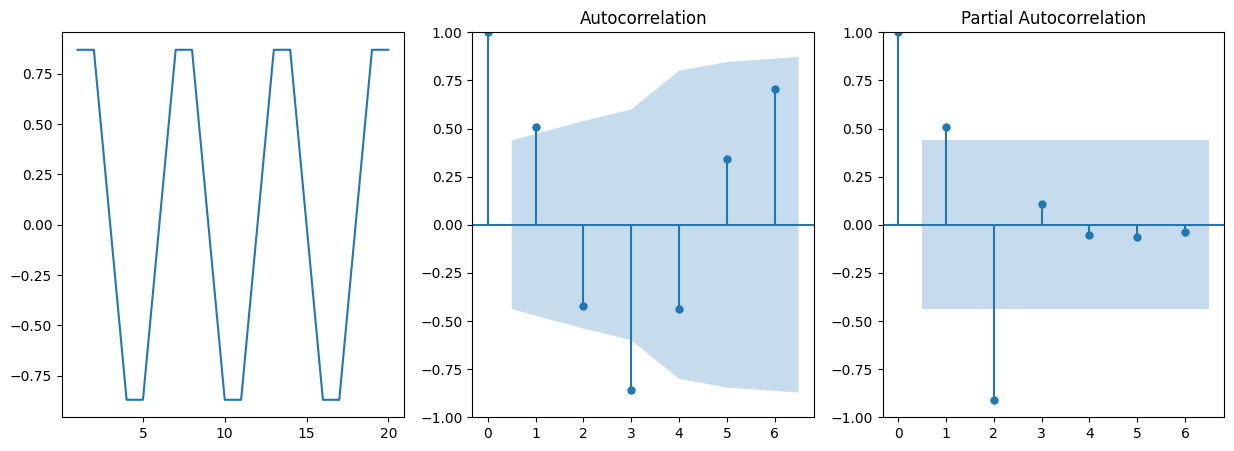

In [7]:
fig, axes = plt.subplots(1,3)
fig.set_size_inches(15,5)
axes[0].plot(x,y);
plot_acf(y,lags=6,ax=axes[1]);
plot_pacf(y,lags=6,method="ywm",ax=axes[2]);

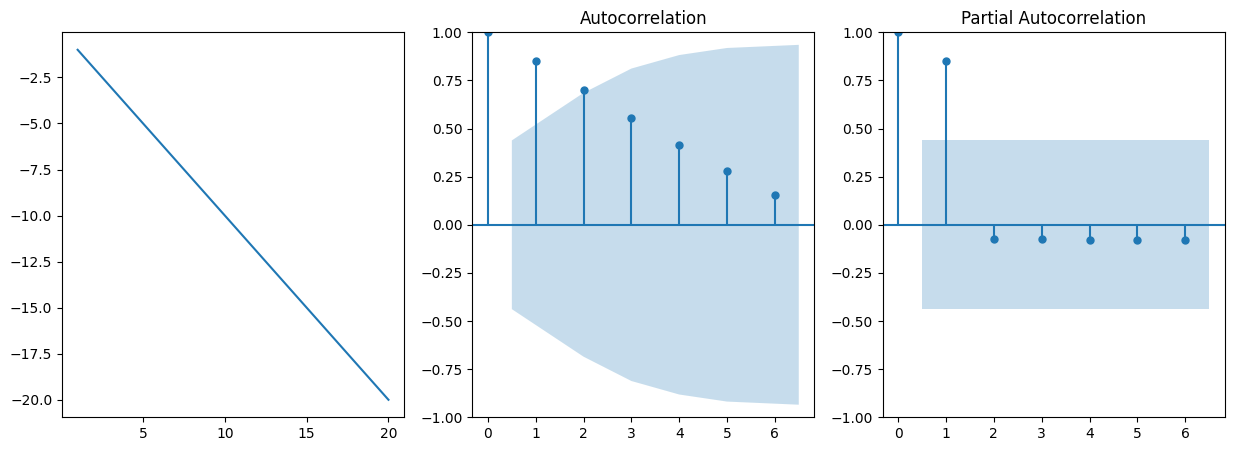

In [11]:
y2=-x
fig, axes = plt.subplots(1,3)
fig.set_size_inches(15,5)
axes[0].plot(x,y2);
plot_acf(y2,lags=6,ax=axes[1]);
plot_pacf(y2,lags=6,method="ywm",ax=axes[2]);

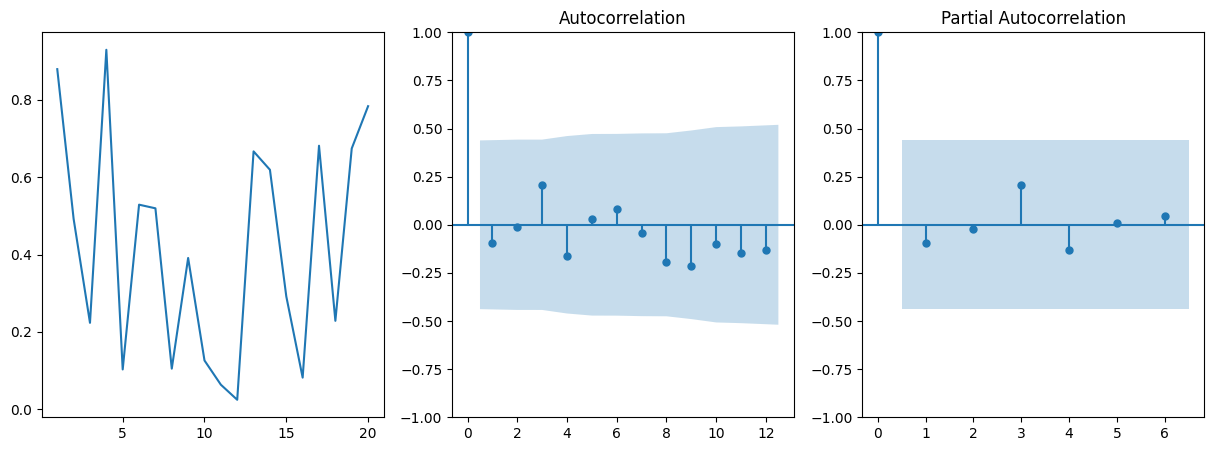

In [12]:
y3=np.random.random(20)
fig, axes = plt.subplots(1,3)
fig.set_size_inches(15,5)
axes[0].plot(x,y3);
plot_acf(y3,lags=12,ax=axes[1]);
plot_pacf(y3,lags=6,method="ywm",ax=axes[2]);

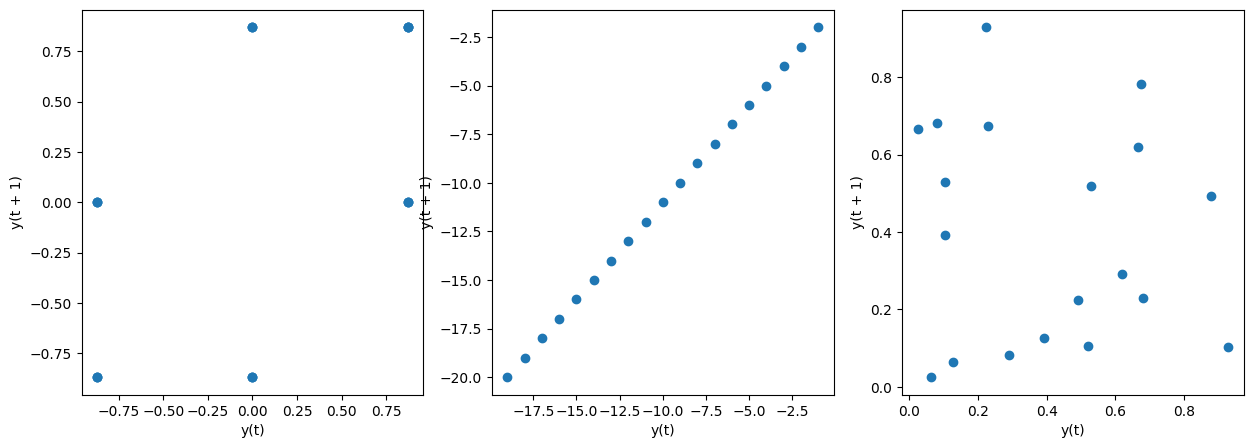

In [13]:
df_s1=pd.DataFrame(y,dtype=float)
df_s2=pd.DataFrame(y2,dtype=float)
df_s3=pd.DataFrame(y3,dtype=float)
fig, axes = plt.subplots(1,3);
fig.set_size_inches(15, 5);
pd.plotting.lag_plot(df_s1, lag=1,ax=axes[0]);
pd.plotting.lag_plot(df_s2, lag=1,ax=axes[1]);
pd.plotting.lag_plot(df_s3, lag=1,ax=axes[2]);

In [14]:
from statsmodels.tsa.arima.model import ARIMA

In [15]:
modelo=ARIMA(y,order=(1,0,1))
predictor=modelo.fit()
print("MSE",predictor.mse)
predictor.summary()

MSE 0.16214547944804542


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   20
Model:                 ARIMA(1, 0, 1)   Log Likelihood                  -9.579
Date:                Wed, 20 Nov 2024   AIC                             27.157
Time:                        20:33:42   BIC                             31.140
Sample:                             0   HQIC                            27.935
                                 - 20                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1535      0.305      0.502      0.615      -0.445       0.752
ar.L1          0.4962      0.294      1.688      0.091      -0.080       1.072
ma.L1          0.9998    235.712      0.004      0.997    -460.987     462.986
sigma2         0.1243     29.310      0.004      0.997     -57.323      57.572
===================================================================================
Ljung-Box (L1) (Q):                   4.83   Jarque-Bera (JB):                 1.88
Prob(Q):                              0.03   Prob(JB):                         0.39
Heteroskedasticity (H):               0.81   Skew:                            -0.16
Prob(H) (two-sided):                  0.79   Kurtosis:                         1.53
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [16]:
x_p=[i+len(x)+1 for i in range(len(x))]

In [17]:
x_p

[21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40]

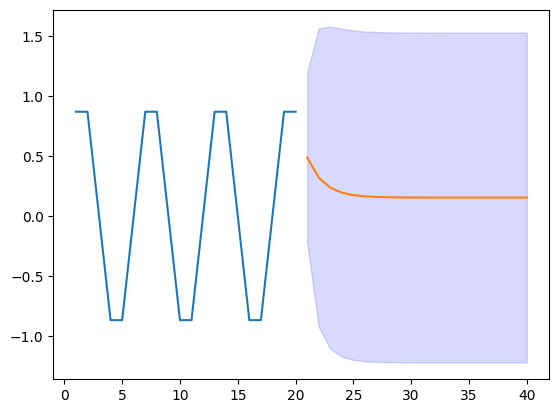

In [18]:
modelo_pred=predictor.get_forecast(steps=len(y))
modelo_ci=modelo_pred.conf_int(0.05)
plt.plot(x,y,x_p,modelo_pred.predicted_mean)
plt.fill_between(x_p,modelo_ci[:,0],modelo_ci[:,1],color="b",alpha=.15)

In [19]:
modelo=ARIMA(y,order=(2,0,3))
predictor=modelo.fit()
print("MSE",predictor.mse)
predictor.summary()

MSE 0.04730505877862737


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   20
Model:                 ARIMA(2, 0, 3)   Log Likelihood                 135.919
Date:                Wed, 20 Nov 2024   AIC                           -257.837
Time:                        20:33:50   BIC                           -250.867
Sample:                             0   HQIC                          -256.477
                                 - 20                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.031e-06      0.000      0.018      0.986      -0.000       0.000
ar.L1          1.0001      0.001   1277.097      0.000       0.999       1.002
ar.L2         -1.0000   7.99e-07  -1.25e+06      0.000      -1.000      -1.000
ma.L1          1.0000   2.16e-07   4.63e+06      0.000       1.000       1.000
ma.L2         -1.0000   2.16e-07  -4.63e+06      0.000      -1.000      -1.000
ma.L3         -1.0000   2.16e-07  -4.64e+06      0.000      -1.000      -1.000
sigma2      9.555e-09   6.85e-09      1.394      0.163   -3.88e-09     2.3e-08
===================================================================================
Ljung-Box (L1) (Q):                   3.82   Jarque-Bera (JB):                72.80
Prob(Q):                              0.05   Prob(JB):                         0.00
Heteroskedasticity (H):               0.01   Skew:                             2.92
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.5e+23. Standard errors may be unstable.
"""

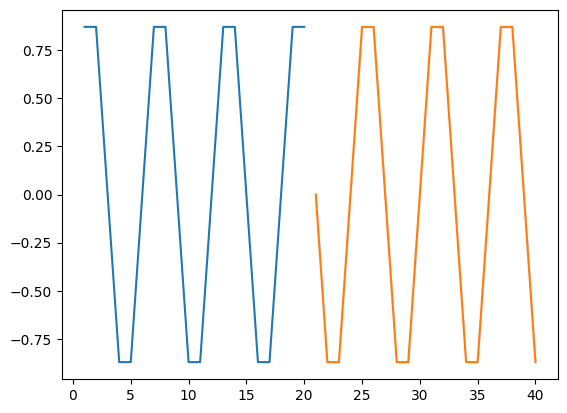

In [20]:
modelo_pred=predictor.get_forecast(steps=len(y))
modelo_ci=modelo_pred.conf_int(0.05)
plt.plot(x,y,x_p,modelo_pred.predicted_mean)
plt.fill_between(x_p,modelo_ci[:,0],modelo_ci[:,1],color="b",alpha=.15)

In [21]:
from statsmodels.tsa.stattools import adfuller

In [22]:
result=adfuller(y)
print("ADF: %f" % result[0])
print("p-value: %f" % result[1])

ADF: -7332993604108922.000000
p-value: 0.000000


In [23]:
result=adfuller(y2)
print("ADF: %f" % result[0])
print("p-value: %f" % result[1])

ADF: -1.758906
p-value: 0.401046


In [24]:
result=adfuller(y3)
print("ADF: %f" % result[0])
print("p-value: %f" % result[1])

ADF: -11.671577
p-value: 0.000000
